# Find the rules from Serotypes

In [2]:
from Serotype_Data import *

In [3]:
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio import pairwise2

from IPython.display import Image

In [4]:
# processing functions

def simplify_genes(gene_list):
    new_list = gene_list[:]
    #Start with ['wzg', 'wzh', 'wzd', 'wze']
    housekeeping = ['wzg', 'wzh', 'wzd', 'wze']
    #Ignore gene 'tnp'
    ignore = ['tnp']
    #Sequence finish with 'aliA'
    finisher = ['aliA']
    polymerase = ['wzy']
    flippase = ['wzx']
    
    #In this stage, we ignore ['wzg', 'wzh', 'wzd', 'wze']['tnp']['aliA']['wzy']['wzx']
    to_remove = housekeeping + ignore + finisher + polymerase + flippase
    
    for gene in to_remove:
        if gene in new_list:
            new_list.remove(gene)
    
    return new_list

In [5]:
def compare_genes(list):
    alignments = pairwise2.align.globalms(simplify_genes(list[0]['genes']), simplify_genes(list[1]['genes']), 2, -1, -2, -.1, gap_char=["-"], one_alignment_only=True, penalize_end_gaps=True) # identical character, mismatched character, gap open, gap extend

    for a in alignments: 
        print(format_alignment(*a, full_sequences=True))

def compare_sugars(list):
    try: 
        list[0]['sugars'] and list[1]['sugars']
        alignments = pairwise2.align.globalms(list[0]['sugars'], list[1]['sugars'], 2, -1, -2, -.1, gap_char=["-"], penalize_end_gaps=True)

        for a in alignments: 
            print(format_alignment(*a, full_sequences=True))
    except KeyError:
        print("** No sugar structure for one or both serotypes **")

def compare_bonds(list):
    alignments = pairwise2.align.globalms(list[0]['bonds'], list[1]['bonds'], 2, -1, -2, -.1, gap_char=["-"], penalize_end_gaps=True)

    for a in alignments: 
        print(format_alignment(*a, full_sequences=True))

def compare_side_branches(list):
    alignments = pairwise2.align.globalms(list[0]['side branches'], list[1]['side branches'], 2, -1, -2, -.1, gap_char=["-"], one_alignment_only=True, penalize_end_gaps=True)

    for a in alignments: 
        print(format_alignment(*a, full_sequences=True))

def compare_lists(list):
    alignments = pairwise2.align.globalms(list[0], list[1], 2, -1, -2, -.1, gap_char=["-"], penalize_end_gaps=True, one_alignment_only=True)

    for a in alignments: 
        print(format_alignment(*a, full_sequences=True))

In [6]:
def predict_sugars(gene_list):
    updated_list = gene_list[:]
    sugars = []
    for gene in simplify_genes(updated_list):
        if gene in rules:
            sugars.append(rules[gene])
            updated_list.remove(gene)
        else:
            sugars.append('?')
    return sugars, updated_list

In [7]:
# Start with serogroup 6
compare_genes([ser_6A, ser_6B])
compare_sugars([ser_6A, ser_6B])

wchA wciN HG262* wciO wciP rmlA rmlC rmlB rmlD  -   
  |    |     .     |    |    |    |    |    |       
wchA wciN HG263* wciO wciP rmlA rmlC rmlB rmlD glf* 
  Score=13

glucose galactose ribitol rhamnose 
   |        |        |        |    
glucose galactose ribitol rhamnose 
  Score=8



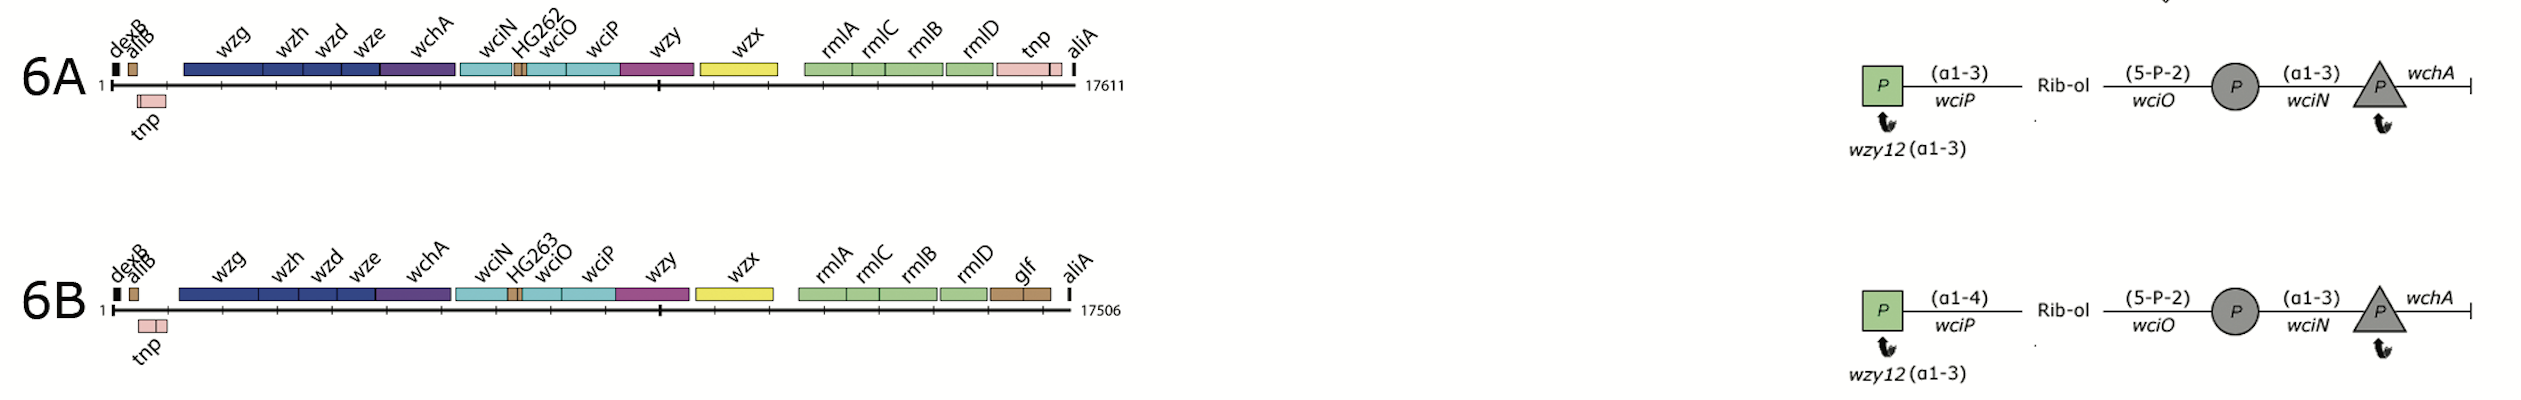

In [8]:
Image(filename='ser_img/6.png')

#### Q. How to deal with galactose, ribitol?
genes ['wciN', 'wciO', 'wciP'] are related to corresponding bonds ['a1-3', '5-P-2','a1-3'/'a1-4'].

gene ['wchA'] -> glucose

gene ['rmlA','rmlC','rmlB','rmlD'] -> rhamnose

In [9]:
# Look into serogroup 7
compare_genes([ser_7A, ser_7B])
compare_sugars([ser_7A, ser_7B])

wchA wchF wcwA wcwC wcwD* HG140* wcwF wcwG wcwH  -    -    -    -    -   rmlA rmlC rmlB rmlD glf* 
  |    |                                                                   |    |    |    |    |  
wchA wchF  -    -     -     -     -    -    -   wcwI wcwL wcwK wcxU rsbF rmlA rmlC rmlB rmlD glf* 
  Score=9

glucose rhamnose galactose N-acetylgalactosamine rhamnose N-acetylglucosamine    -       -        -     
   |        |                                        |             |                                    
glucose rhamnose     -               -           rhamnose N-acetylglucosamine glucose rhamnose ribose-f 
  Score=3.7



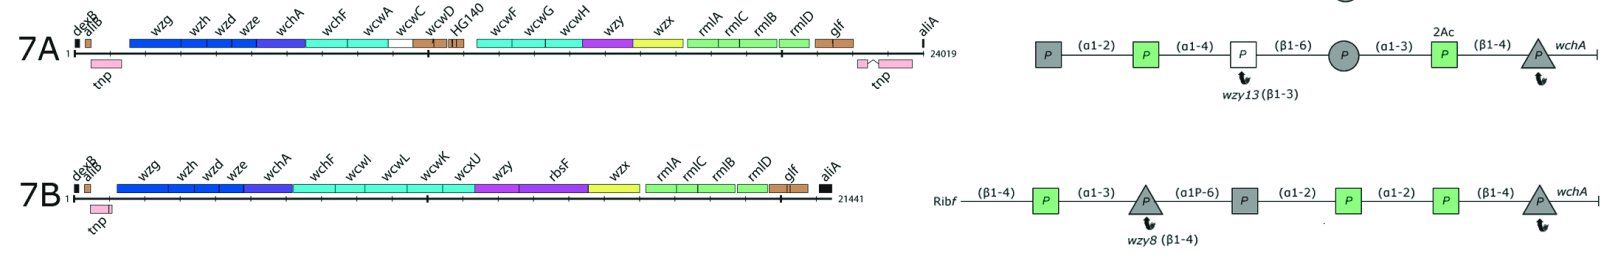

In [10]:
Image(filename='ser_img/7_AB.png')

In [11]:
rules = dict()

In [12]:
# looking at 7A vs 7B
try:
    print(rules['wchA'])
except:
    print("New rule")
    rules['wchA'] = 'glucose'
    
try:
    print(rules['wchF'])
except:
    print("New rule")
    rules['wchF'] = 'rhamnose'


New rule
New rule


In [13]:
rules

{'wchA': 'glucose', 'wchF': 'rhamnose'}

In [14]:
# looking at 7A vs 7B
# eliminate both genes from the candidates to explain other sugars

sugars, trimmed_genes = predict_sugars(ser_7A['genes'])
print("Remaining genes: ", simplify_genes(trimmed_genes))
print("Predicted sugars: ", sugars)


Remaining genes:  ['wcwA', 'wcwC', 'wcwD*', 'HG140*', 'wcwF', 'wcwG', 'wcwH', 'rmlA', 'rmlC', 'rmlB', 'rmlD', 'glf*']
Predicted sugars:  ['glucose', 'rhamnose', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


In [15]:
compare_genes([ser_7F, ser_7A])
compare_sugars([ser_7F, ser_7A])

wchA wchF wcwA wcwC wcwD  HG140* wcwF wcwG wcwH rmlA rmlC rmlB rmlD glf* 
  |    |    |    |    .      |     |    |    |    |    |    |    |    |  
wchA wchF wcwA wcwC wcwD* HG140* wcwF wcwG wcwH rmlA rmlC rmlB rmlD glf* 
  Score=25

glucose rhamnose galactose N-acetylgalactosamine rhamnose N-acetylglucosamine 
   |        |        |               |               |             |          
glucose rhamnose galactose N-acetylgalactosamine rhamnose N-acetylglucosamine 
  Score=12



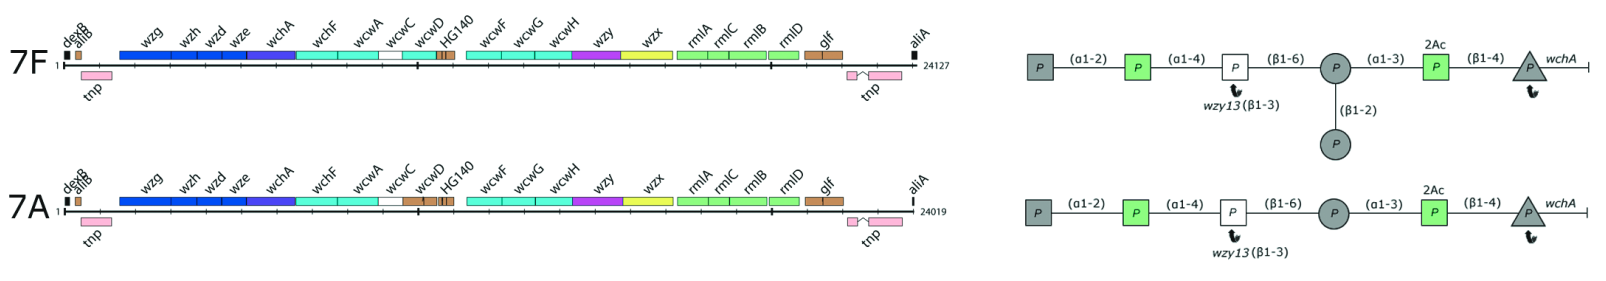

In [16]:
Image(filename='ser_img/7_FA.png')

#### Q. How can we deal with this?
Serotype 7F and 7A have same sequence of genes and same sugars. However, they have different bonds types. 

In addition, 7F has side branch on 3rd sugar. 

In [17]:
#difference
compare_side_branches([ser_7A, ser_7F]) 

                 
||     .      |||
  P-galactose    
  Score=9



In [18]:
try:
    print(rules['wcwD'])
except:
    print("New rule")
    rules['wcwD'] = 'side_P-galactose'

New rule


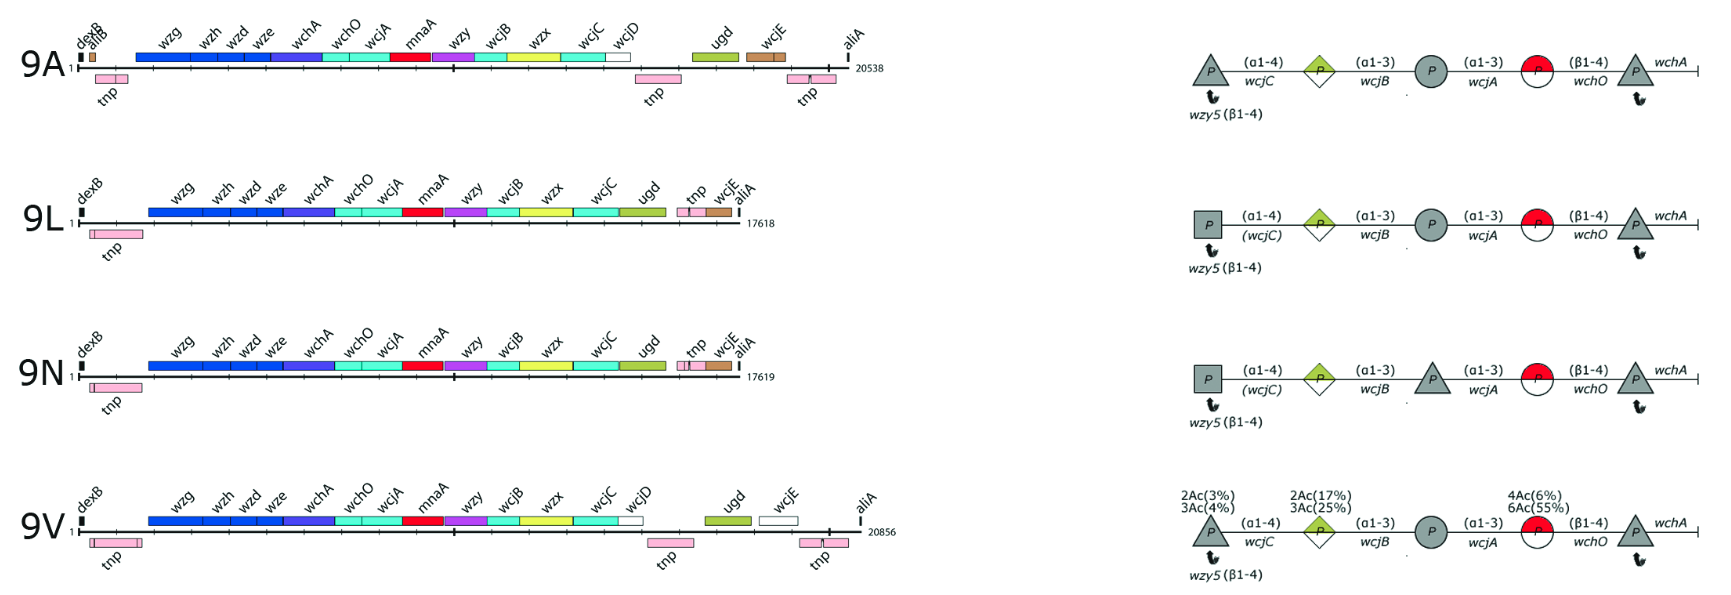

In [19]:
#  Look into serogroup 9
Image(filename='ser_img/9.png')

Serotype 9A and 9V have same sugar structure even though they have difference in gene sequences.
##### To do. Figure out wcjE

In [20]:
compare_genes([ser_9A, ser_9V])
compare_sugars([ser_9A, ser_9V])
compare_bonds([ser_9A, ser_9V])

wchA wchO wcjA mnaA wcjB wcjC wcjD ugd wcjE* 
  |    |    |    |    |    |    |   |    .   
wchA wchO wcjA mnaA wcjB wcjC wcjD ugd wcjE  
  Score=15

glucose N-acetylmannosamine galactose glucuronic acid glucose 
   |             |              |            |           |    
glucose N-acetylmannosamine galactose glucuronic acid glucose 
  Score=10

b1-4 a1-3 a1-3 a1-4 
  |    |    |    |  
b1-4 a1-3 a1-3 a1-4 
  Score=8



In [26]:
compare_genes([ser_9A, ser_9L])
compare_sugars([ser_9A, ser_9L])
compare_bonds([ser_9A, ser_9L])

wchA wchO wcjA mnaA wcjB wcjC wcjD ugd wcjE* 
  |    |    |    |    |    |        |    |   
wchA wchO wcjA mnaA wcjB wcjC  -   ugd wcjE* 
  Score=14

glucose N-acetylmannosamine galactose glucuronic acid       glucose       
   |             |              |            |                 .          
glucose N-acetylmannosamine galactose glucuronic acid N-acetylglucosamine 
  Score=7

b1-4 a1-3 a1-3 a1-4 
  |    |    |    |  
b1-4 a1-3 a1-3 a1-4 
  Score=8



#### Q. How to deal with genes under the bonds?
genes ['wcj0', 'wcjA', 'wcjB', 'wcjC'] are related to bonds? or sugars?

In [29]:
# From Nicole
#rules['wchO'] = 'N-acetylmannosamine'
#rules['wcjA'] = 'galactose/glucose'
#rules['wcjB'] = 'glucuronic acid'
#rules['wcjC'] = 'N-acetylglucosamine'
#rules['wcjD'] = 'N-acetylglucosamine -> glucose'

Let's assume genes ['wcj0', 'wcjA', 'wcjB', 'wcjC'] are related to bonds.

In [27]:
#From my opinion
# Bonds
# rules['wchO'] = 'b1-4'
# rules['wcjA'] = 'a1-3'
# rules['wcjB'] = 'a1-3'
# rules['wcjC'] = 'a1-4'
rules['mnaA'] = 'N-acetylmannosamine'
rules['ugd'] = 'glucuronic acid'


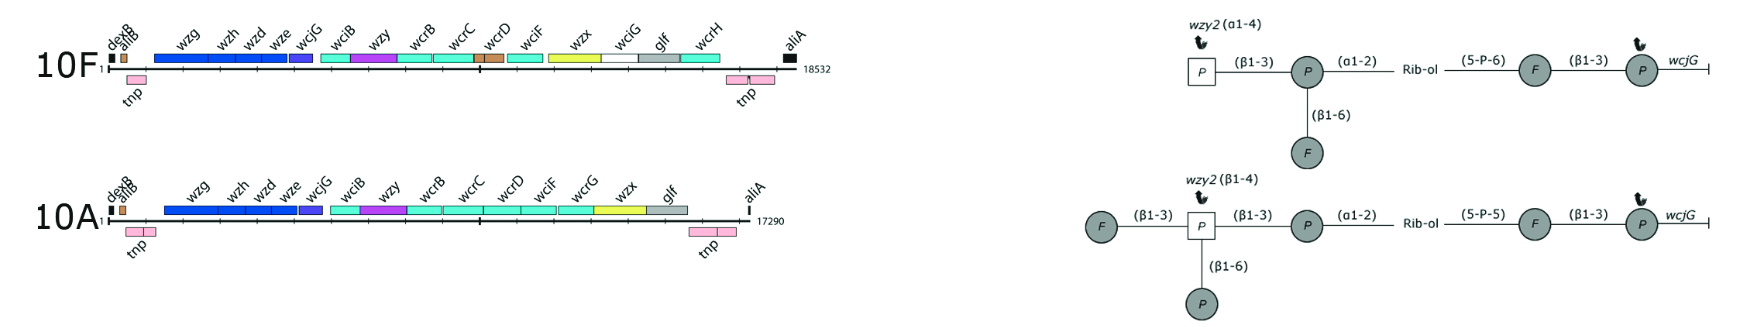

In [32]:
# Look into serogroup 10
# 10B & 10C -> No structure
Image(filename='ser_img/10.png')

In [44]:
compare_genes([ser_10F, ser_10A])
compare_sugars([ser_10F, ser_10A])
compare_bonds([ser_10F, ser_10A])
compare_side_branches([ser_10F, ser_10A])


wcjG wciB wcrB wcrC wcrD* wciF wciG wcrH 
  |    |    |    |    .     |    .    .  
wcjG wciB wcrB wcrC wcrD  wciF wcrG glf  
  Score=7

galactose galactose ribitol galactose N-acetylgalactosamine     -     
    |         |        |        |               |                     
galactose galactose ribitol galactose N-acetylgalactosamine galactose 
  Score=8

b1-3 5-P-6 a1-2 b1-3  -   
  |    .     |    |       
b1-3 5-P-5 a1-2 b1-3 b1-3 
  Score=3

b1-3 5-P-6 a1-2  -   b1-3 
  |    .     |         |  
b1-3 5-P-5 a1-2 b1-3 b1-3 
  Score=3

   F-galactose      -       
|||     .                  |
               P-galactose  
  Score=5



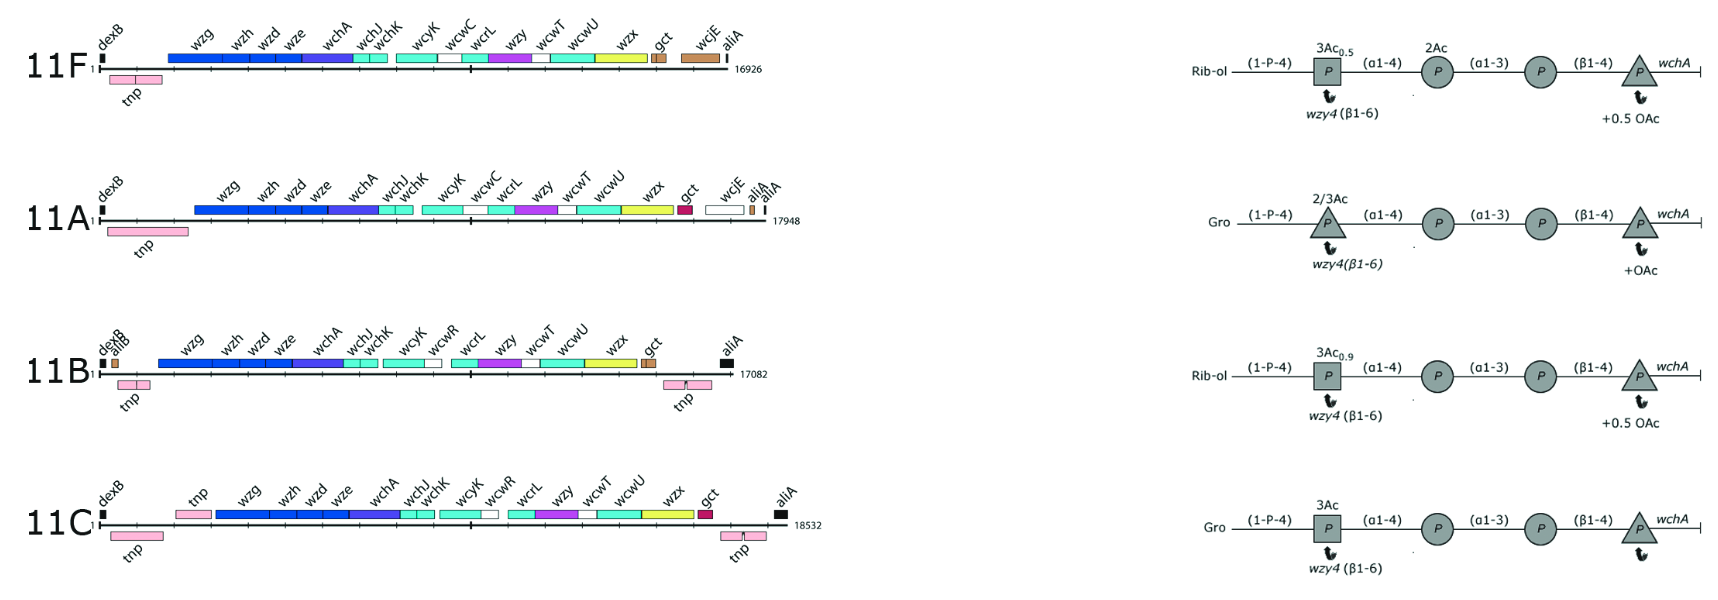

In [30]:
# Look into serogroup 11
# 11D -> No structure
Image(filename='ser_img/11.png')

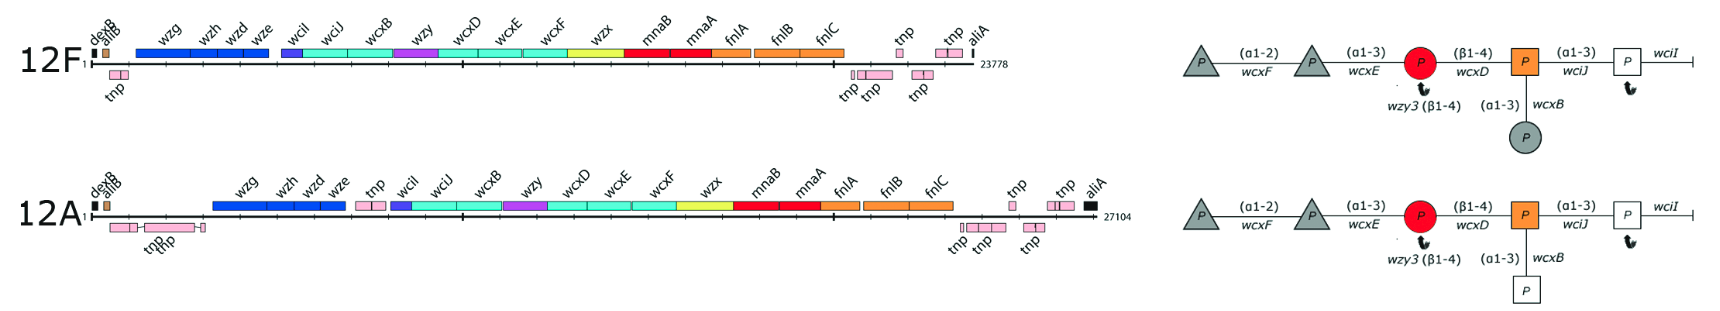

In [31]:
# Look into serogroup 12
# 12B -> No structure
Image(filename='ser_img/12.png')

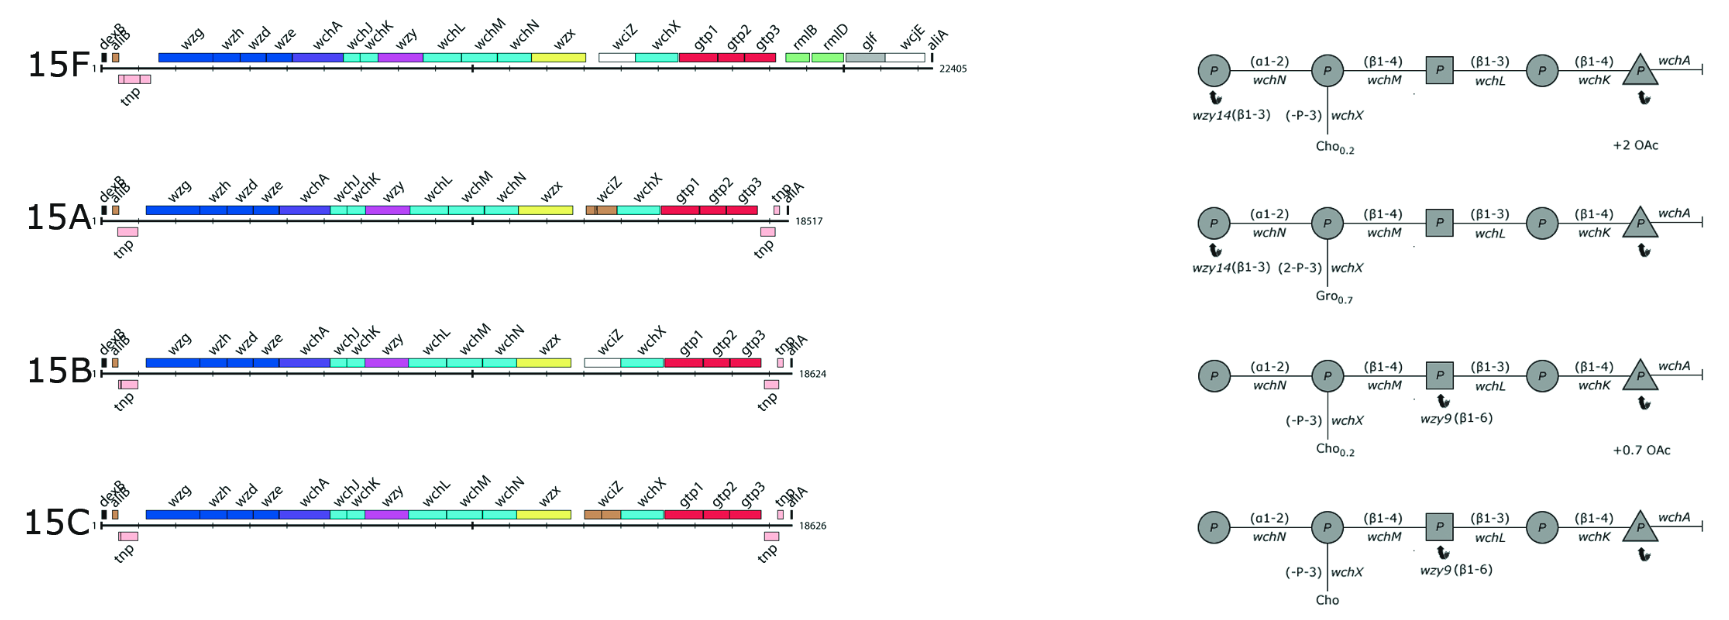

In [33]:
# Look into serogroup 15
Image(filename='ser_img/15.png')

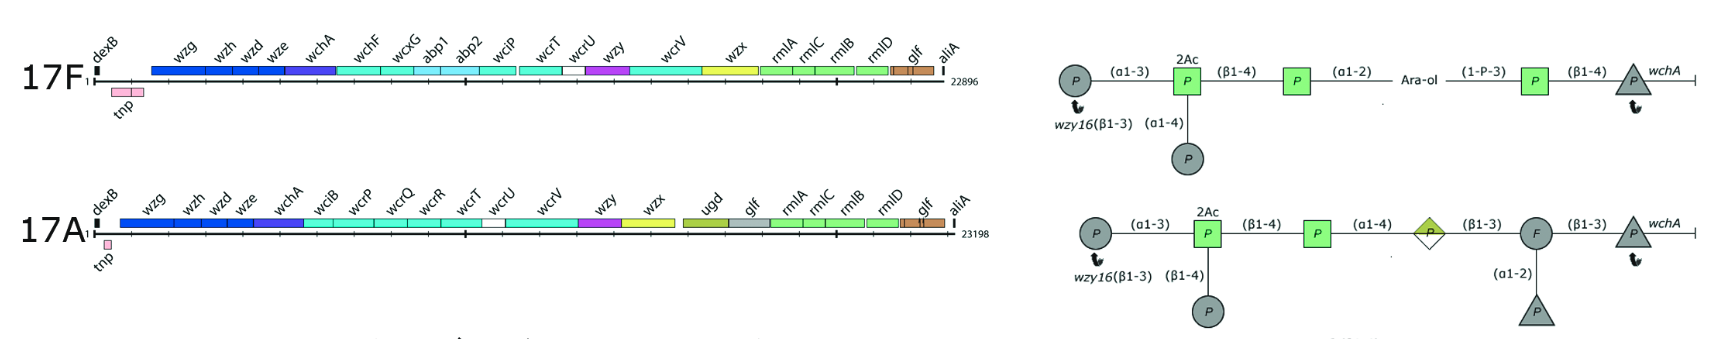

In [34]:
# Look into serogroup 17
Image(filename='ser_img/17.png')

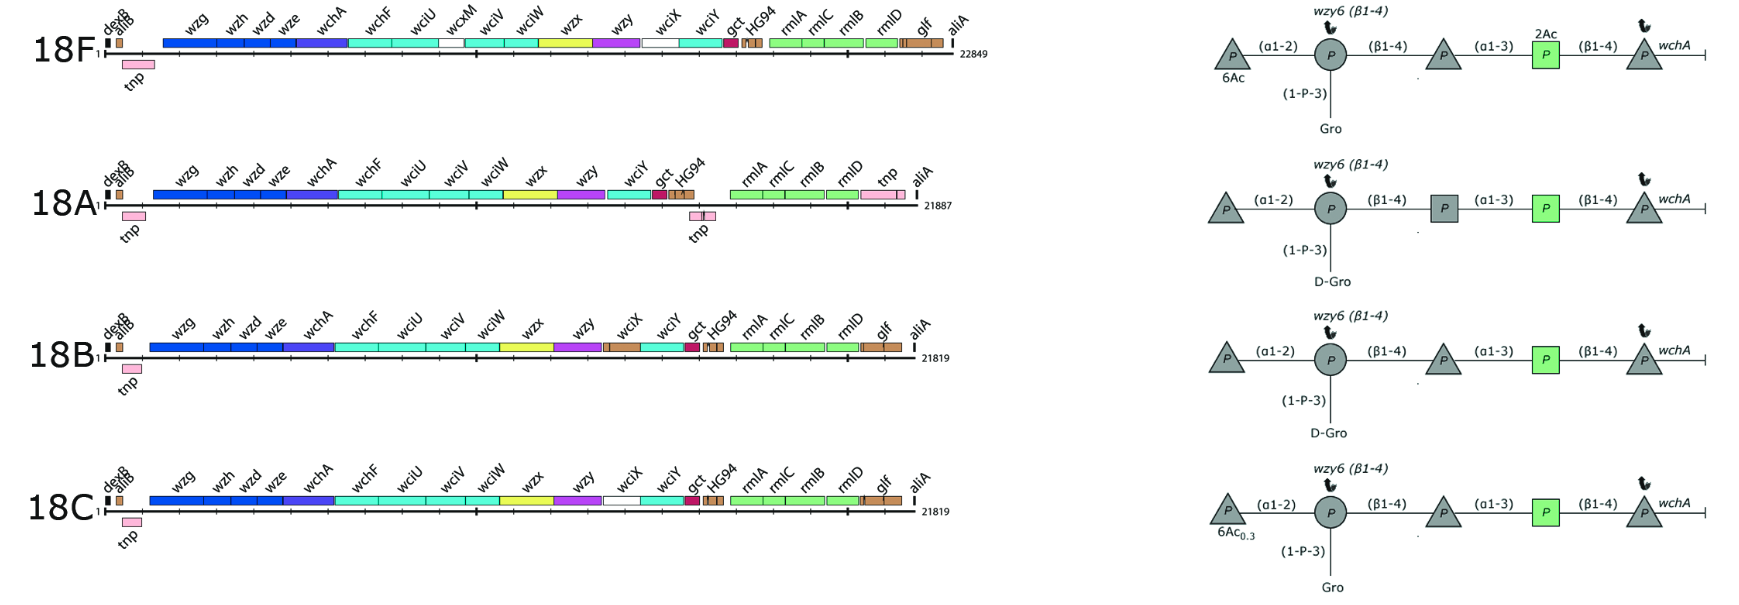

In [35]:
# Look into serogroup 18
Image(filename='ser_img/18.png')

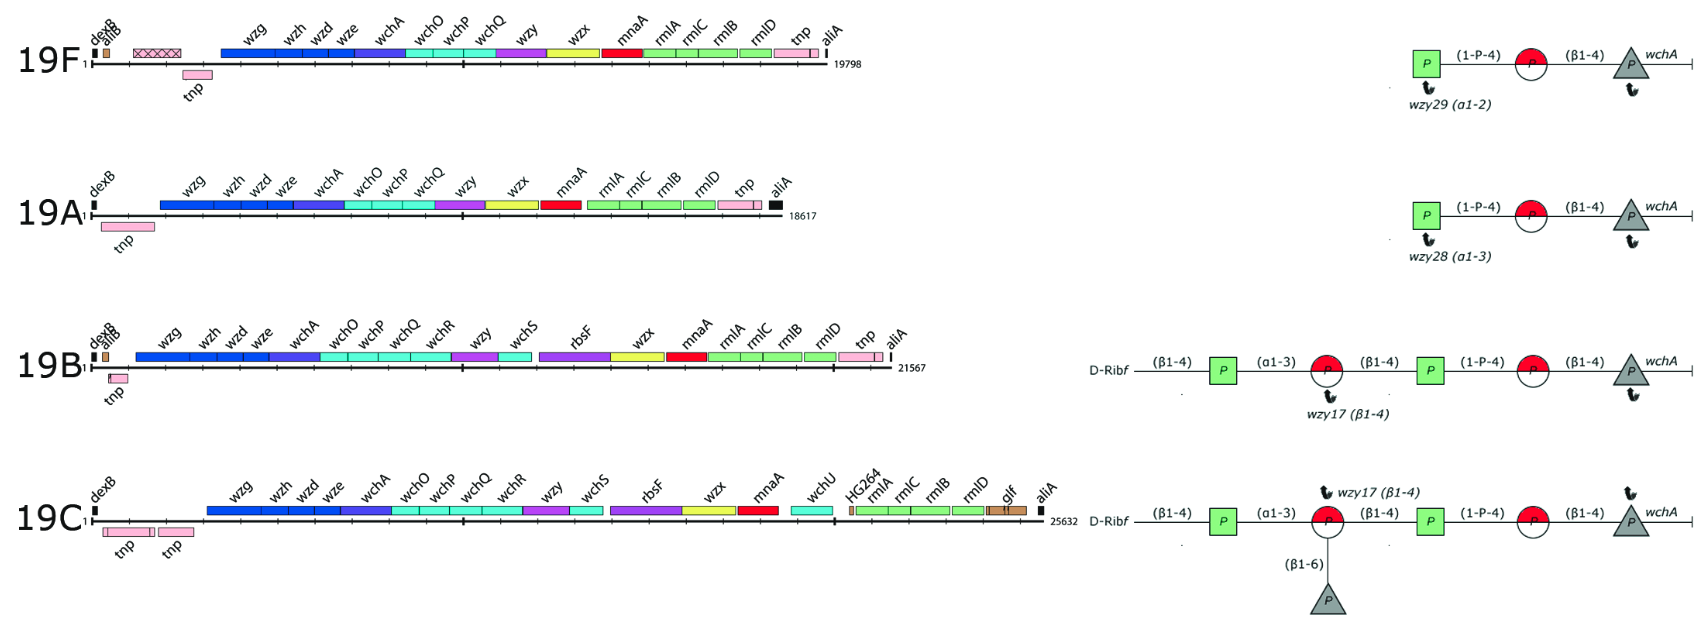

In [36]:
# Look into serogroup 19
Image(filename='ser_img/19.png')

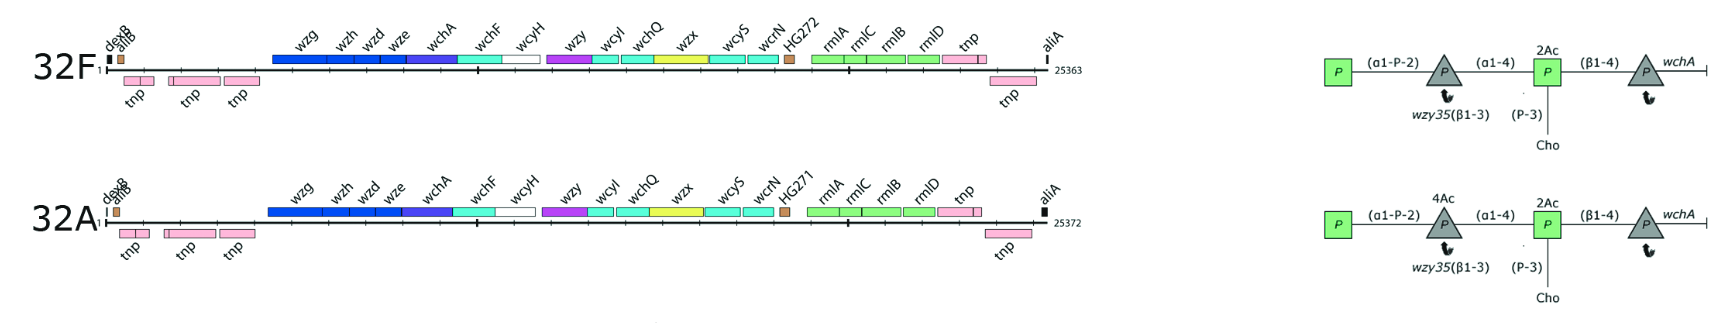

In [37]:
# Look into serogroup 32
Image(filename='ser_img/32.png')

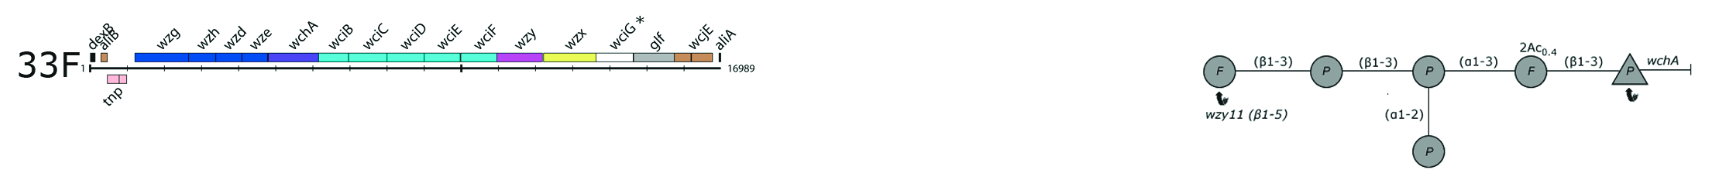

In [40]:
# Look into serogroup 33
Image(filename='ser_img/33_F.png')

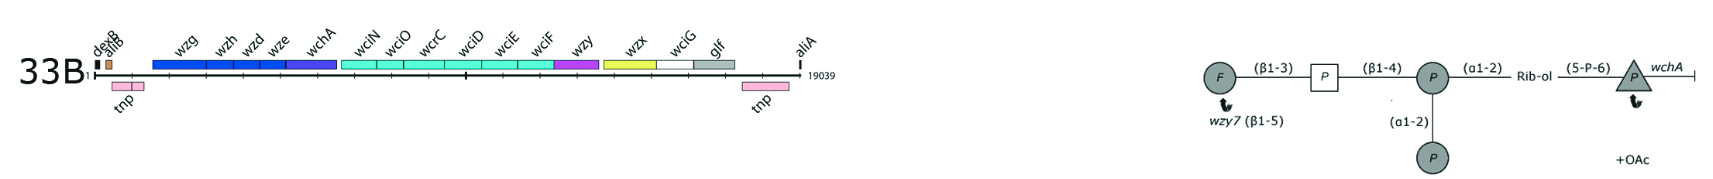

In [41]:
Image(filename='ser_img/33_B.png')

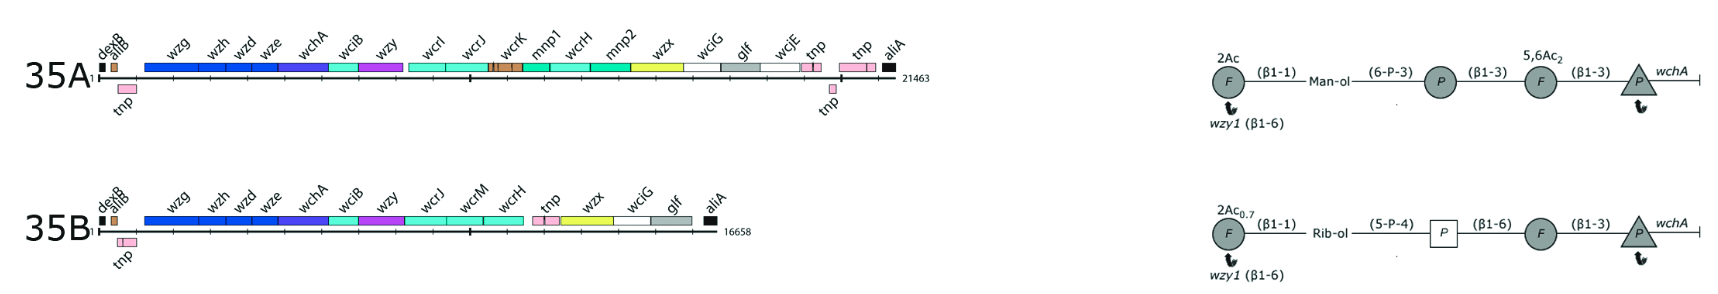

In [42]:
# Look into serogroup 35
Image(filename='ser_img/35.png')

In [ ]:
# serotype 7C - No structure
# serotype 10B - No structure
# serotype 10C - No structure
# serotype 11D - No structure
# serotype 12B - No structure
# serotype 16F - No structure
# serotype 16A - No structure
# serotype 21 - No structure
# serotype 22A - No structure
# serotype 23A - No structure
# serotype 24F - No structure
# serotype 24A - No structure
# serotype 24B - No structure
# serotype 25F - No structure
# serotype 25A - No structure
# serotype 28F - No structure
# serotype 28A - No structure
# serotype 33A - No structure
# serotype 33C - No structure
# serotype 33D - No structure
# serotype 35F - No structure
# serotype 35C - No structure
# serotype 36 - No structure
# serotype 38 - No structure
# serotype 39 - No structure
# serotype 40 - No structure
# serotype 41F - No structure
# serotype 41A - No structure
# serotype 42 - No structure
# serotype 43 - No structure
# serotype 44 - No structure
# serotype 46 - No structure
# serotype 47F - No structure
# serotype 47A - No structure
# serotype 48 - No structure